# Importing Libraries

In [1]:
! pip install chembl_webresource_client

In [2]:
!pip install lazypredict

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Search for Target protein (Acetylcholinesterase)


In [4]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Drosophila melanogaster,Acetylcholinesterase,18.00,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
1,[],Homo sapiens,Acetylcholinesterase,16.00,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Torpedo californica,Acetylcholinesterase,16.00,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
3,[],Mus musculus,Acetylcholinesterase,16.00,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Acetylcholinesterase,16.00,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
5,[],Electrophorus electricus,Acetylcholinesterase,16.00,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
6,[],Bos taurus,Acetylcholinesterase,16.00,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913
7,[],Bemisia tabaci,AChE2,16.00,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
8,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.00,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
9,[],Nephotettix cincticeps,Ace-orthologous acetylcholinesterase,16.00,False,CHEMBL2366514,"[{'accession': 'Q9NJH6', 'component_descriptio...",SINGLE PROTEIN,94400


# Select and retrieve bioactivity data for Human Acetylcholinesterase (first entry)

We will assign the fifth entry (which corresponds to the target protein, Human Acetylcholinesterase) to the selected_target variable

In [5]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL220'

Here, we will retrieve only bioactivity data for Human Acetylcholinesterase (CHEMBL220) that are reported as pChEMBL values.

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [7]:
df = pd.DataFrame.from_dict(res)
df.head()     

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [8]:
# save the resulting bioactivity data to a CSV file bioactivity_raw.csv.
df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)

# Handling missing data

If any compounds has missing value for the standard_value and canonical_smiles column then drop it.


In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2
     

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25724873,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,46.0
9411,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25724874,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,38.31
9412,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25733694,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.71
9413,None,None,25733695,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [10]:
len(df2.canonical_smiles.unique())

6642

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25724873,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,46.0
9411,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25724874,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,38.31
9412,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25733694,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.71
9413,None,None,25733695,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,10.0


# Data pre-processing of the bioactivity data
     

### Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
9410,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0
9411,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0
9412,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0
9413,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0


### Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [13]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
9410,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0
9411,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0
9412,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0
9413,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0


In [14]:
df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)

### Labeling compounds as either being active, inactive or intermediate

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [15]:
df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [16]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [17]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5
     

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.00,inactive
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.00,inactive
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.00,intermediate
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.00,inactive


In [18]:
df5.to_csv('acetylcholinesterase_03_bioactivity_data_curated.csv', index=False)

In [19]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.00,inactive
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.00,inactive
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.00,intermediate
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.00,inactive


In [20]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [21]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [22]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles
     

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.00,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
8123,CHEMBL5398421,46000.00,inactive,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2
8124,CHEMBL11298,38310.00,inactive,N[C@@H](CO)C(=O)O
8125,CHEMBL5395312,1710.00,intermediate,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...
8126,CHEMBL5399112,10000.00,inactive,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...


# Calculate Lipinski descriptors

In [23]:
!conda install -c conda-forge rdkit -y

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [24]:

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Calculate descriptors

In [25]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors
     

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski
     


,MW,LogP,NumHDonors,NumHAcceptors
0,312.33,2.80,0.00,6.00
1,376.91,4.55,0.00,5.00
2,426.85,5.36,0.00,5.00
3,404.85,4.71,0.00,5.00
4,346.33,3.10,0.00,6.00
...,...,...,...,...
8123,301.30,2.01,4.00,6.00
8124,105.09,-1.61,3.00,3.00
8125,401.47,2.96,3.00,5.00
8126,387.45,2.61,4.00,5.00


### Combine DataFrames

Let's take a look at the 2 DataFrames that will be combined.

In [26]:
df_lipinski
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.00,inactive
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.00,inactive
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.00,intermediate
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.00,inactive


###  combine the 2 DataFrame

In [27]:
df_combined = pd.concat([df,df_lipinski], axis=1)
     

In [28]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.33,2.80,0.00,6.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.91,4.55,0.00,5.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.85,5.36,0.00,5.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.85,4.71,0.00,5.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.33,3.10,0.00,6.00
...,...,...,...,...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.00,inactive,301.30,2.01,4.00,6.00
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.00,inactive,105.09,-1.61,3.00,3.00
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.00,intermediate,401.47,2.96,3.00,5.00
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.00,inactive,387.45,2.61,4.00,5.00


### Convert IC50 to pIC50

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

In [29]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative

In [30]:
df_combined.standard_value.describe()

count       8128.00
mean       96217.16
std       984091.69
min            0.00
25%          100.00
50%         1504.50
75%        12400.00
max     50000000.00
Name: standard_value, dtype: float64

In [31]:
-np.log10( (10**-9)* 100000000 )

1.0

In [32]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [33]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [34]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.33,2.80,0.00,6.00,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.91,4.55,0.00,5.00,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.85,5.36,0.00,5.00,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.85,4.71,0.00,5.00,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.33,3.10,0.00,6.00,800.00
...,...,...,...,...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.30,2.01,4.00,6.00,46000.00
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.09,-1.61,3.00,3.00,38310.00
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,401.47,2.96,3.00,5.00,1710.00
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.45,2.61,4.00,5.00,10000.00


In [35]:
df_norm.standard_value_norm.describe()
     

count       8128.00
mean       96217.16
std       984091.69
min            0.00
25%          100.00
50%         1504.50
75%        12400.00
max     50000000.00
Name: standard_value_norm, dtype: float64

In [36]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.33,2.80,0.00,6.00,6.12
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.91,4.55,0.00,5.00,7.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.85,5.36,0.00,5.00,4.30
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.85,4.71,0.00,5.00,6.52
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.33,3.10,0.00,6.00,6.10
...,...,...,...,...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.30,2.01,4.00,6.00,4.34
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.09,-1.61,3.00,3.00,4.42
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,401.47,2.96,3.00,5.00,5.77
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.45,2.61,4.00,5.00,5.00


In [37]:
df_final.pIC50.describe()
     

count   8128.00
mean        inf
std         NaN
min        1.30
25%        4.91
50%        5.82
75%        7.00
max         inf
Name: pIC50, dtype: float64

In [38]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

## Removing the 'intermediate' bioactivity class

we will be removing the intermediate class from our data set.

In [39]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.33,2.80,0.00,6.00,6.12
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.91,4.55,0.00,5.00,7.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.85,5.36,0.00,5.00,4.30
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.85,4.71,0.00,5.00,6.52
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.33,3.10,0.00,6.00,6.10
...,...,...,...,...,...,...,...,...
8122,CHEMBL5435795,O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2,inactive,243.26,1.86,2.00,4.00,4.23
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.30,2.01,4.00,6.00,4.34
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.09,-1.61,3.00,3.00,4.42
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.45,2.61,4.00,5.00,5.00


In [40]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

# Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

### Import library

## Frequency plot of the 2 bioactivity classes

In [41]:
print(df_2class[['MW', 'LogP', 'pIC50']].isna().sum())  # Check NaNs
print(np.isinf(df_2class[['MW', 'LogP', 'pIC50']]).sum())  # Check Inf/-Inf

MW       0
LogP     0
pIC50    0
dtype: int64
MW       0
LogP     0
pIC50    1
dtype: int64


In [42]:
df_2class = df_2class.replace([np.inf, -np.inf], np.nan)  # Replace Inf with NaN
df_2class = df_2class.dropna(subset=['MW', 'LogP', 'pIC50'])  # D

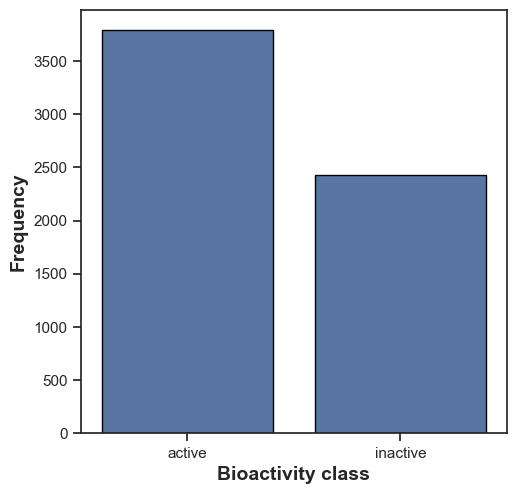

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

## Scatter plot of MW versus LogP

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

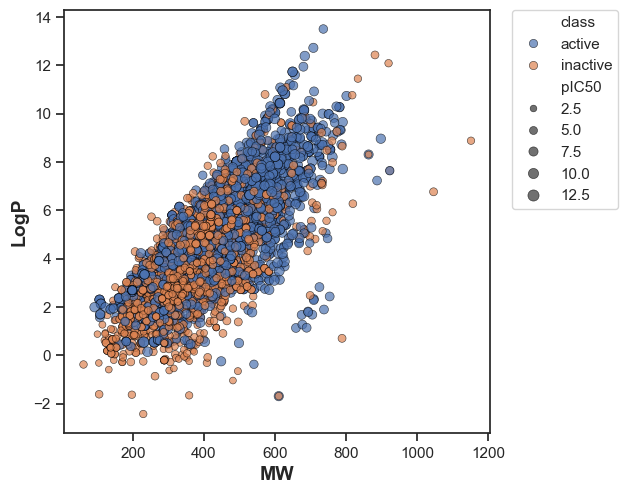

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## Box plots

### pIC50 value

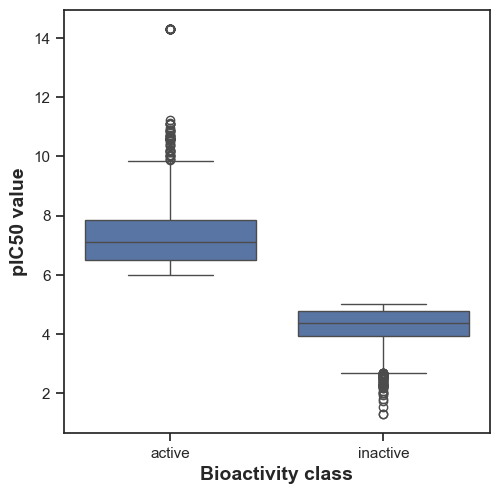

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### Statistical analysis | Mann-Whitney U Test

In [46]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
     


In [47]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,9203184.00,0.00,0.05,Different distribution (reject H0)


#### MW

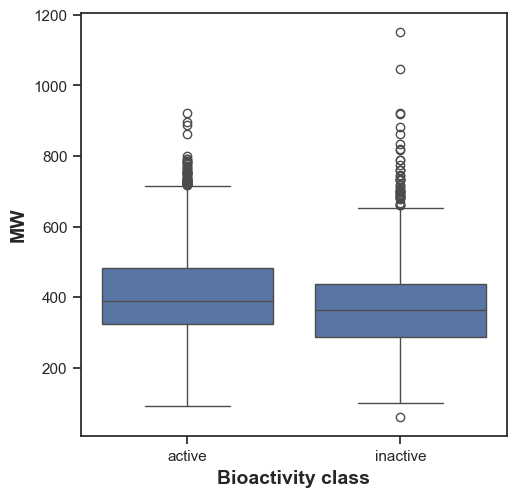

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [49]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,5382809.00,0.00,0.05,Different distribution (reject H0)


### LogP

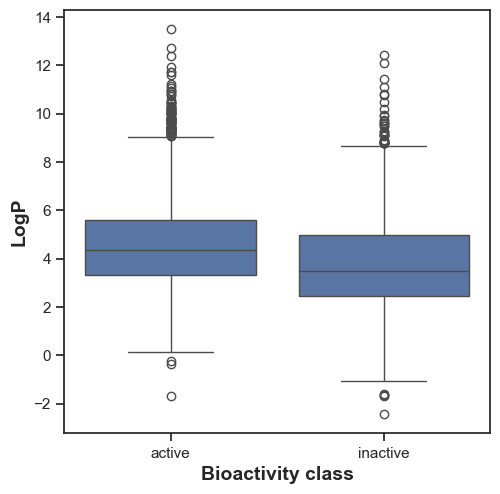

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

### Statistical analysis | Mann-Whitney U Test

In [51]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,5778786.50,0.00,0.05,Different distribution (reject H0)


### NumHDonors

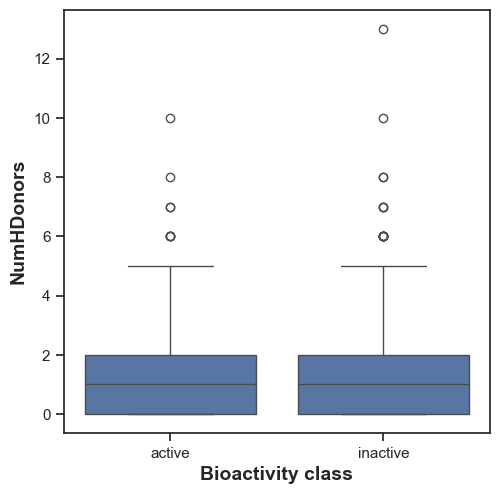

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

### Statistical analysis | Mann-Whitney U Test

In [53]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,4979928.50,0.00,0.05,Different distribution (reject H0)


### NumHAcceptors

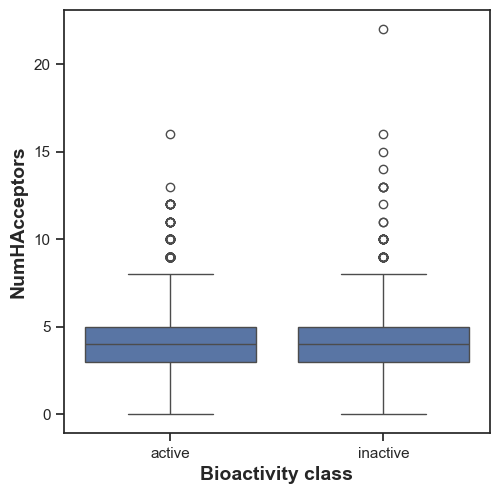

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [55]:
mannwhitney('NumHAcceptors')
     

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4581438.00,0.77,0.05,Same distribution (fail to reject H0)


### Interpretation of Statistical Results

### Box Plots
#### pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

#### Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

## Descriptor Calculation and Dataset Preparation

### Download PaDEL-Descriptor

In [56]:
! curl -L -o padel.zip https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! curl -L -o padel.sh https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:07 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:08 --:--:--     0
  0     0    0     0    0     0      0      0 --:-

In [57]:
import zipfile

with zipfile.ZipFile("padel.zip", 'r') as zip_ref:
    zip_ref.extractall(".") 

In [58]:
df6 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')


In [59]:
df6

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.33,2.80,0.00,6.00,6.12
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.91,4.55,0.00,5.00,7.00
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.85,5.36,0.00,5.00,4.30
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.85,4.71,0.00,5.00,6.52
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.33,3.10,0.00,6.00,6.10
...,...,...,...,...,...,...,...,...,...
8123,8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.30,2.01,4.00,6.00,4.34
8124,8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.09,-1.61,3.00,3.00,4.42
8125,8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,401.47,2.96,3.00,5.00,5.77
8126,8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.45,2.61,4.00,5.00,5.00


In [60]:
selection = ['canonical_smiles','molecule_chembl_id']
df6_selection = df6[selection]
df6_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [61]:
with open("molecule.smi", "r") as file:
    for _ in range(5):  # Read first 5 lines
        print(file.readline().strip())

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [62]:
num_lines = sum(1 for line in open("molecule.smi"))
print(num_lines)

8128


## Calculate fingerprint descriptors

#### Calculate PaDEL descriptors

In [63]:
with open("padel.sh", "r") as file:
    print(file.read())

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv



In [64]:
! "C:/Program Files/Git/git-bash.exe" -c "echo 'Git Bash is working' && ./padel.sh"






In [65]:

! "C:/Program Files/Git/git-bash.exe" -c "ls -l"

## Preparing the X and Y Data Matrices

### X data matrix

In [66]:
df6_X = pd.read_csv('descriptors_output.csv')

In [67]:
df6_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL130098,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL336538,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL341437,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,CHEMBL5434024,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,CHEMBL5398421,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,CHEMBL5395312,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,CHEMBL5399112,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df6_X = df6_X.drop(columns=['Name'])
df6_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8124,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8125,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8126,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Y variable

### Convert IC50 to pIC50

In [69]:
df6_Y = df6['pIC50']
df6_Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
8123   4.34
8124   4.42
8125   5.77
8126   5.00
8127   5.00
Name: pIC50, Length: 8128, dtype: float64

## Combining X and Y variable

In [70]:
dataset6 = pd.concat([df6_X,df6_Y], axis=1)
dataset6

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.34
8124,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.42
8125,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.77
8126,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.00


In [71]:
dataset6.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# Training the Classification Model

In [72]:
df6 = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

##  Input features

In [73]:
X = df6.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8124,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8125,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8126,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Output features

In [74]:
Y = df6.pIC50
Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
8123   4.34
8124   4.42
8125   5.77
8126   5.00
8127   5.00
Name: pIC50, Length: 8128, dtype: float64

## Let's examine the data dimension

In [75]:
X.shape

(8128, 881)

##  Remove low variance features

In [76]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)


In [77]:
X.shape

(8128, 137)

In [78]:
Y.shape

(8128,)

## Data split (80/20 ratio)

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
X_train.shape, Y_train.shape

((6502, 137), (6502,))

In [81]:
X_test.shape, Y_test.shape

((1626, 137), (1626,))

# Building a Regression Model using Random Forest

In [82]:


print(np.isinf(Y_train).sum(), "inf values in Y_train")
print(np.isinf(Y_test).sum(), "inf values in Y_test")
print(np.isnan(Y_train).sum(), "NaN values in Y_train")
print(np.isnan(Y_test).sum(), "NaN values in Y_test")

1 inf values in Y_train
0 inf values in Y_test
0 NaN values in Y_train
0 NaN values in Y_test


In [83]:
print(Y_train[np.isinf(Y_train)])  # Print the inf values
print(Y_train.index[np.isinf(Y_train)])

6736   inf
Name: pIC50, dtype: float64
Index([6736], dtype='int64')


In [84]:
Y_train.loc[6736] = np.median(Y_train[Y_train != np.inf])

# Compare Machine Learning Algorithms

In [85]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [02:24<00:00,  1.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 6502, number of used features: 137
[LightGBM] [Info] Start training from score 5.972764


100%|██████████| 42/42 [02:24<00:00,  3.43s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [02:18<00:01,  1.65s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 6502, number of used features: 137
[LightGBM] [Info] Start training from score 5.972764


100%|██████████| 42/42 [02:19<00:00,  3.31s/it]


In [86]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.71,0.72,0.84,0.17
ExtraTreesRegressor,0.71,0.72,0.84,13.42
DecisionTreeRegressor,0.71,0.72,0.84,0.23
GaussianProcessRegressor,0.71,0.72,0.84,22.24
RandomForestRegressor,0.67,0.67,0.90,11.08
BaggingRegressor,0.65,0.66,0.92,1.25
XGBRegressor,0.64,0.65,0.93,1.11
MLPRegressor,0.60,0.60,0.99,16.71
HistGradientBoostingRegressor,0.46,0.47,1.15,2.01


In [87]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.29,0.35,1.32,0.53
HistGradientBoostingRegressor,0.29,0.35,1.32,4.12
XGBRegressor,0.28,0.34,1.33,0.39
RandomForestRegressor,0.28,0.34,1.33,10.60
KNeighborsRegressor,0.25,0.31,1.36,0.16
BaggingRegressor,0.25,0.31,1.36,0.99
NuSVR,0.24,0.30,1.37,6.62
MLPRegressor,0.23,0.30,1.37,16.57
SVR,0.23,0.29,1.37,8.77


# Data visualization of model performance

[(0.0, 1.0)]

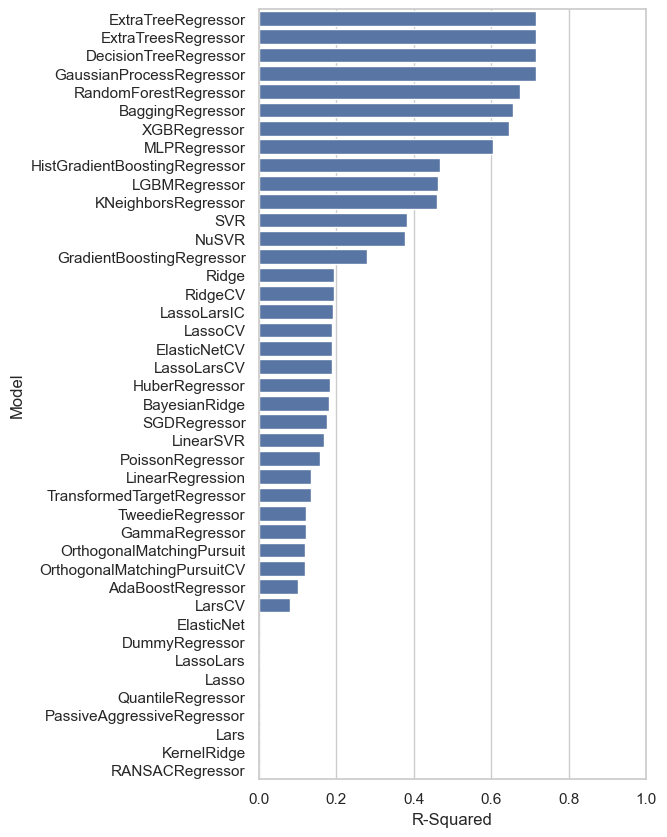

In [88]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

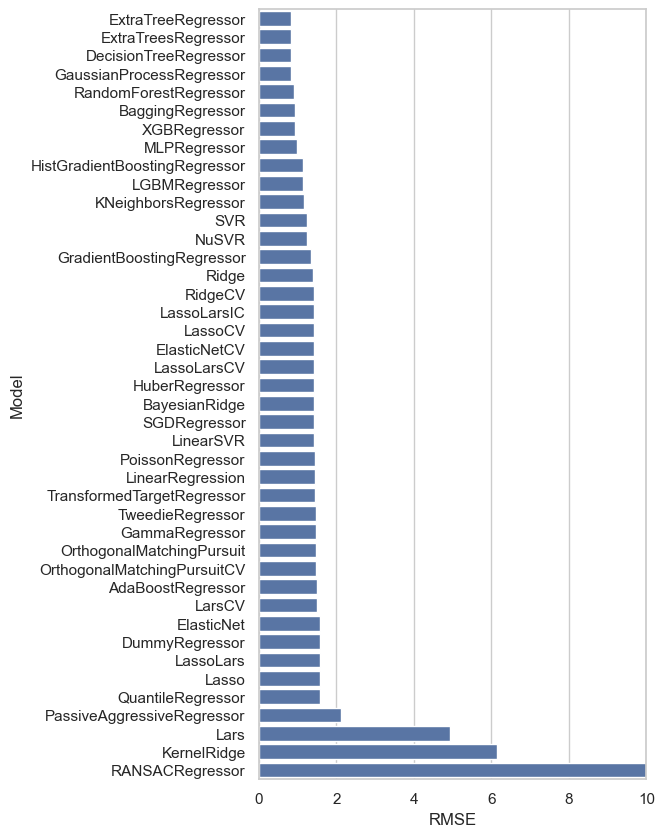

In [89]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

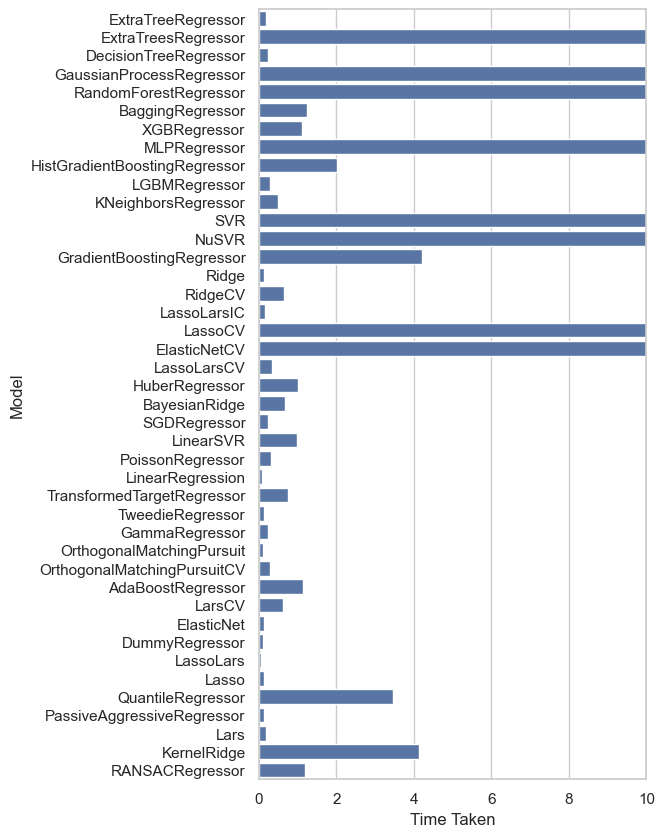

In [90]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
     

In [91]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3467811031934551

In [92]:
Y_pred = model.predict(X_test)

# Scatter Plot of Experimental vs Predicted pIC50 Values

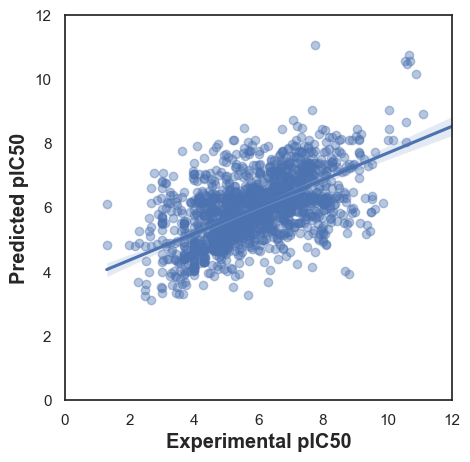

In [93]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()  # <- Call plt.show() as a function, not as a variable